## Importing Libraries & Data

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

## Explore Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.describe(include='O').transpose()

,count,unique,top,freq
Gender,200,2,Female,112


## Check Null Values

In [9]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Duplicated values

In [10]:
data[data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


## Data Analysis & Visualization

In [11]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

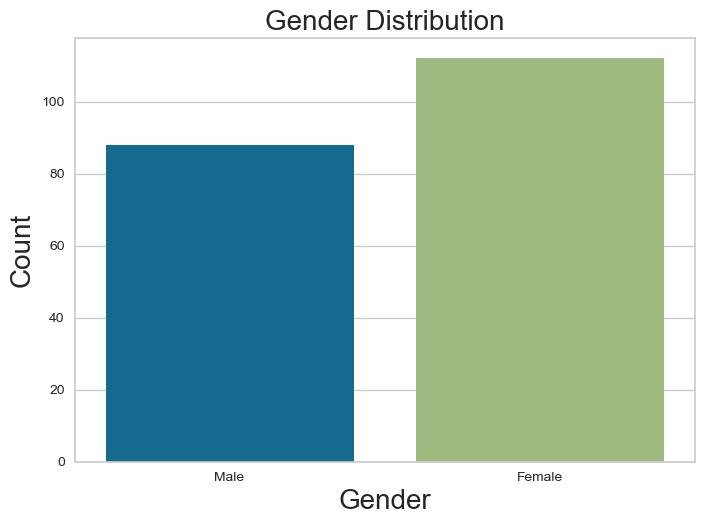

In [12]:
sns.countplot(x=data.Gender)
plt.title('Gender Distribution',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

D:\Project\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


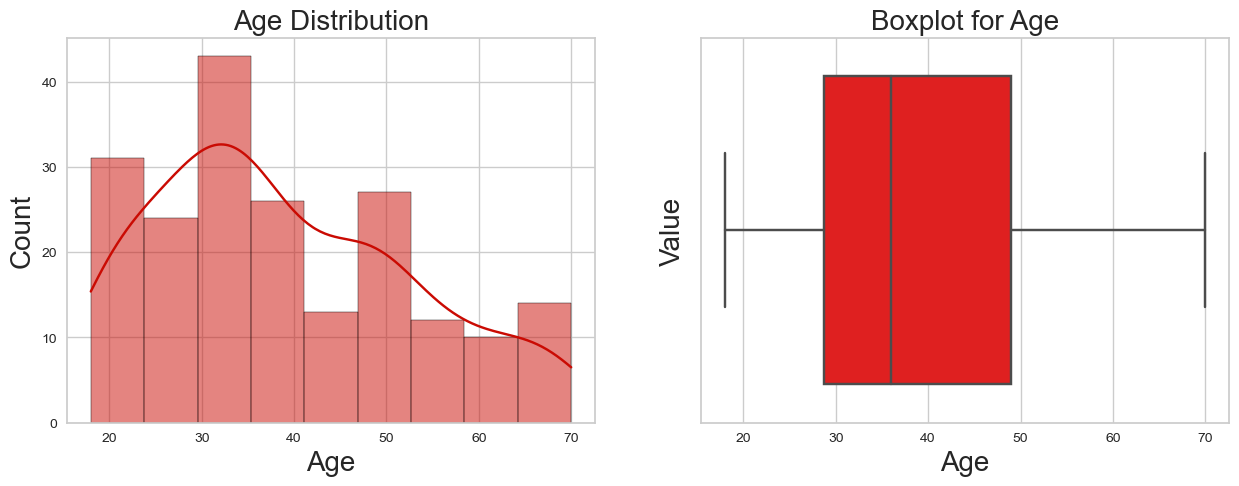

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Age Distribution',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
sns.histplot(data['Age'],kde=True,color='r')
plt.subplot(1,2,2)
sns.boxplot(data['Age'],color='red')
plt.title('Boxplot for Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.show()

D:\Project\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


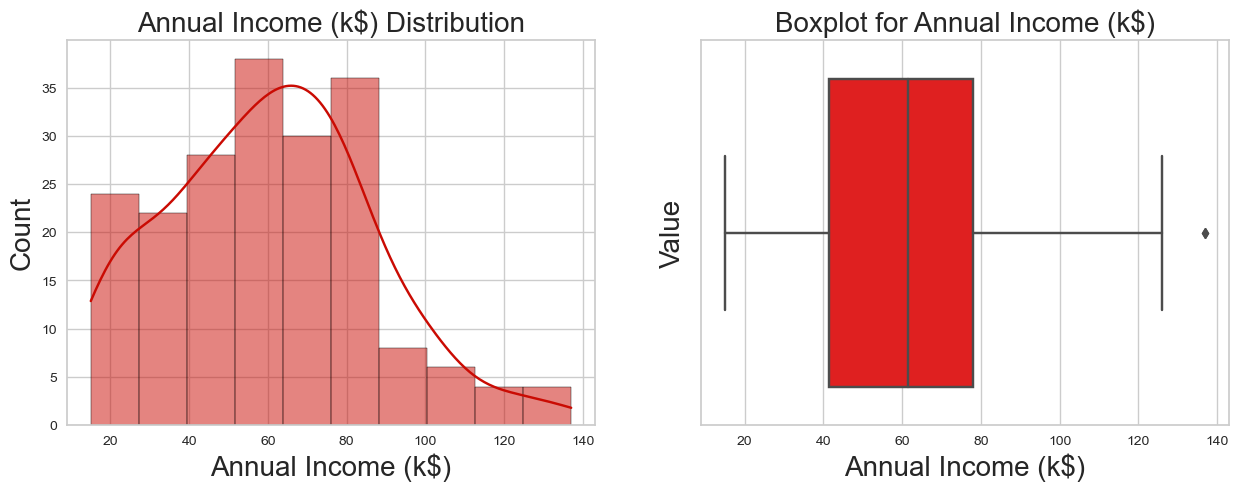

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Annual Income (k$) Distribution',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Count',fontsize=20)
sns.histplot(data['Annual Income (k$)'],kde=True,color='r')
plt.subplot(1,2,2)
sns.boxplot(data['Annual Income (k$)'],color='red')
plt.title('Boxplot for Annual Income (k$)',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.show()

D:\Project\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


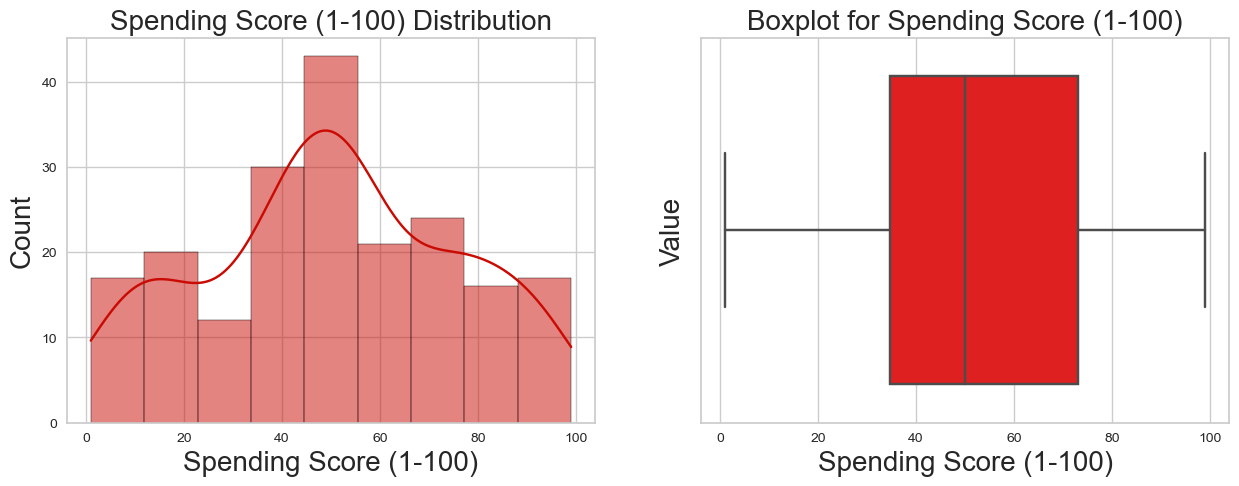

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Spending Score (1-100) Distribution',fontsize=20)
plt.xlabel('Spending Score (1-100)',fontsize=20)
plt.ylabel('Count',fontsize=20)
sns.histplot(data['Spending Score (1-100)'],kde=True,color='r')
plt.subplot(1,2,2)
sns.boxplot(data['Spending Score (1-100)'],color='red')
plt.title('Boxplot for Spending Score (1-100)',fontsize=20)
plt.xlabel('Spending Score (1-100)',fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.show()

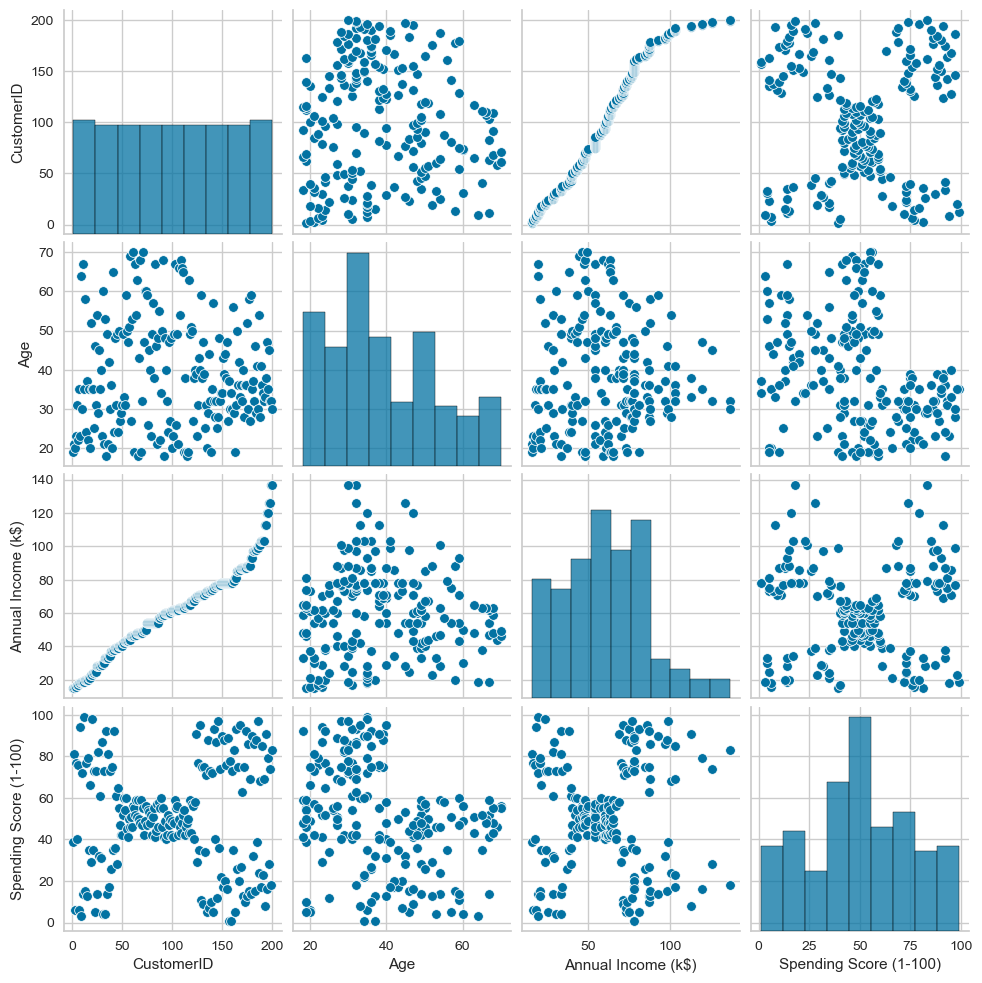

In [16]:
sns.pairplot(data = data)

Model Construction

In [17]:
data.Gender[data.Gender=='Male']=1
data.Gender[data.Gender=='Female']=0
data.head()

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_11732\2117489637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data.Gender=='Male']=1
C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_11732\2117489637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender[data.Gender=='Female']=0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [18]:
key=data.columns
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
data = scaler.fit_transform(data)
data=pd.DataFrame(data,columns=key)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


For Feature Annual Income (k$)	Spending Score (1-100)

In [19]:
X=data.iloc[:,3:]

In [20]:
X

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [21]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

In [22]:
wcss = []
n=20
for i in range(1,n):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=44)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)
wcss

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[21.435418284916395,
 12.884821226993775,
 8.346071490833658,
 5.533801599032261,
 3.3368221729443226,
 2.871567222422546,
 2.4200403296200474,
 2.029193544354069,
 1.699929085538797,
 1.4716562540139722,
 1.306184875492215,
 1.1589837543885304,
 1.0512588850203157,
 0.9495805248618227,
 0.8940596089218825,
 0.796748734937127,
 0.7297473089381777,
 0.6646956829436225,
 0.6142482466918647]

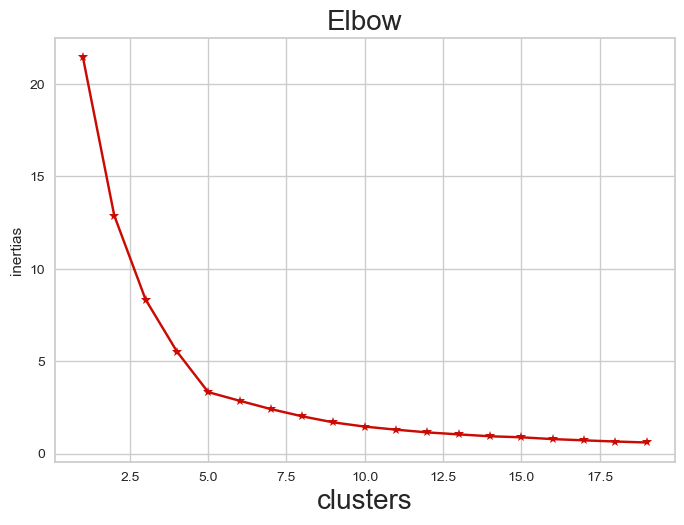

In [23]:
plt.plot(range(1,n),wcss,marker='*',c='r')
plt.title('Elbow',fontsize=20)
plt.xlabel('clusters',fontsize=20)
plt.ylabel('inertias')
plt.show()

another way

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


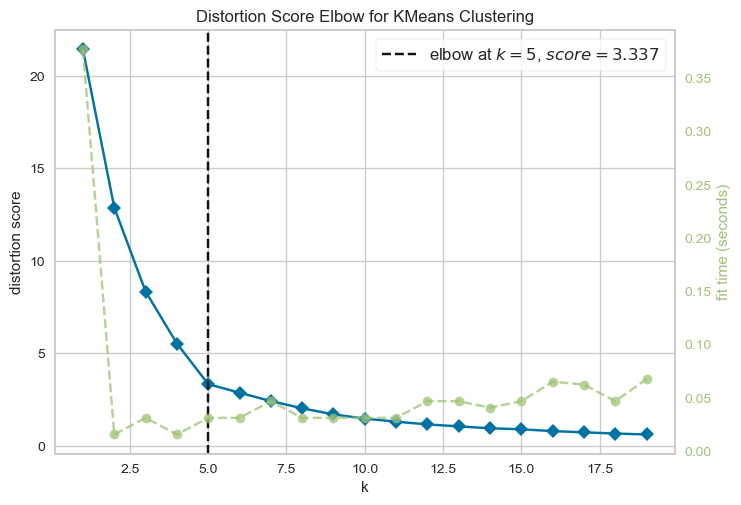

In [24]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [25]:
#Number Of Cluster 5
KMeansModel = KMeans(n_clusters=5,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[0.60285563 0.15009875]
 [0.08630665 0.81692677]
 [0.5912716  0.82735797]
 [0.08665105 0.1909621 ]
 [0.33407178 0.49103696]]
KMeansModel labels are :  [2 4 4 1 3 3 2 0 4 0 4 0 4 4 4 4 0 2 4 4 0 4 4 4 4 2 2 4 1 0 3 3 1 4 0 4 4
 4 2 3 4 4 1 3 2 2 0 0 0 4 0 2 4 0 2 2 4 4 1 1 2 1 4 2 3 2 0 4 4 0 2 1 0 1
 4 0 4 1 2 4 3 4 0 0 4 4 3 2 2 3 4 4 4 2 1 4 3 3 4 0 4 1 3 3 2 2 4 2 4 4 4
 0 0 2 1 4 4 0 2 3 4 2 4 0 0 1 4 4 2 2 3 3 3 4 4 4 0 0 4 2 1 4 3 4 0 4 0 4
 4 2 2 4 4 1 2 4 0 4 4 0 4 2 3 1 4 4 4 4 0 4 2 4 2 4 4 2 4 2 2 3]
KMeansModel intertia is :  3.3368221729443226
KMeansModel No. of iteration is :  6


In [26]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([2, 4, 2, 3, 1, 4, 4, 1, 4, 0, 0, 4, 0, 4, 1, 4, 1, 1, 4, 4])

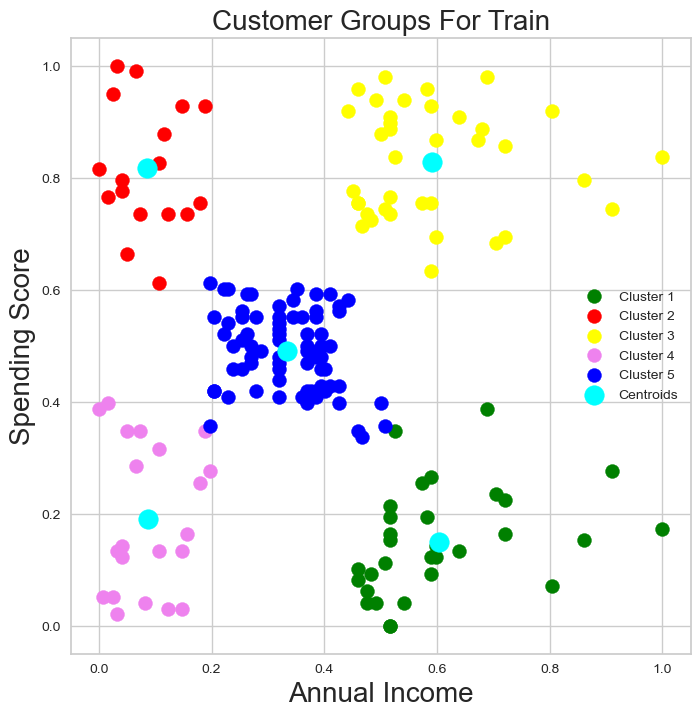

In [27]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
plt.scatter(X_train.iloc[y==4,0], X_train.iloc[y==4,1], s=100, c='blue', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()

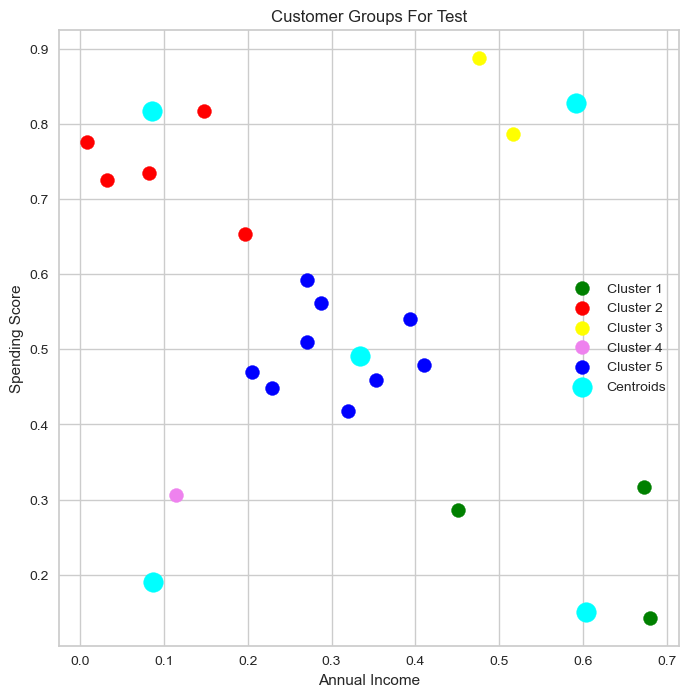

In [28]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='violet', label='Cluster 4')
plt.scatter(X_test.iloc[y_pred==4,0], X_test.iloc[y_pred==4,1], s=100, c='blue', label='Cluster 5')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()


AgglomerativeClustering

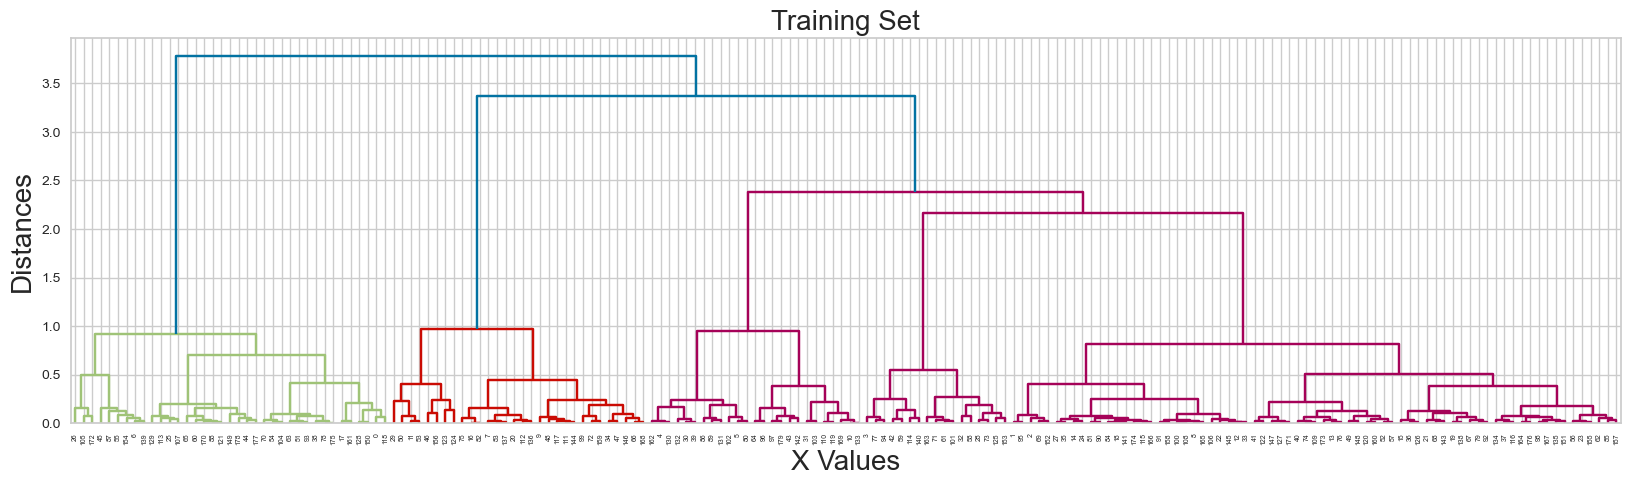

In [29]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

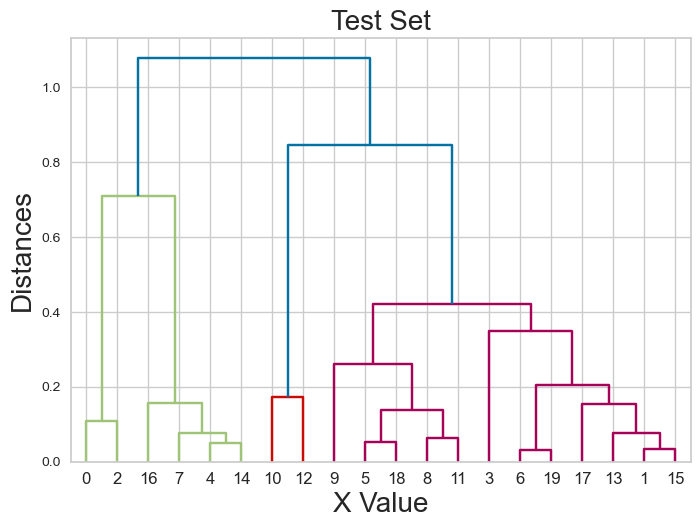

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [31]:
#number of cluster 5
AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [32]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([3, 2, 2, 4, 1, 1, 3, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2,
        2, 2, 2, 3, 3, 2, 4, 0, 1, 1, 4, 2, 0, 2, 2, 2, 3, 1, 2, 2, 4, 1,
        3, 3, 0, 0, 0, 2, 0, 3, 2, 0, 3, 3, 2, 2, 4, 4, 3, 4, 2, 3, 1, 3,
        0, 2, 2, 2, 3, 4, 0, 4, 2, 0, 2, 4, 3, 2, 1, 2, 0, 0, 2, 2, 1, 3,
        3, 1, 2, 2, 2, 3, 4, 2, 1, 1, 2, 0, 2, 4, 1, 1, 3, 3, 2, 3, 2, 2,
        1, 0, 0, 3, 4, 2, 2, 0, 3, 1, 2, 3, 2, 0, 0, 4, 2, 2, 3, 3, 1, 1,
        1, 1, 2, 2, 0, 0, 2, 3, 4, 2, 1, 2, 0, 2, 0, 2, 2, 3, 3, 2, 2, 4,
        3, 2, 0, 2, 2, 0, 2, 3, 1, 4, 2, 2, 2, 2, 0, 1, 3, 2, 3, 2, 2, 3,
        2, 3, 3, 1], dtype=int64),
 'Test',
 array([3, 0, 3, 0, 4, 1, 0, 4, 1, 1, 2, 1, 2, 0, 4, 0, 4, 0, 1, 0],
       dtype=int64))

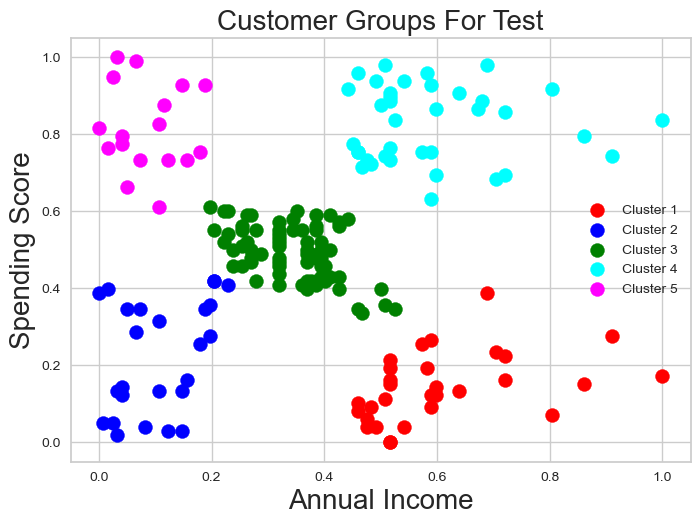

In [33]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_train.iloc[y_pred_train == 4, 0], X_train.iloc[y_pred_train == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

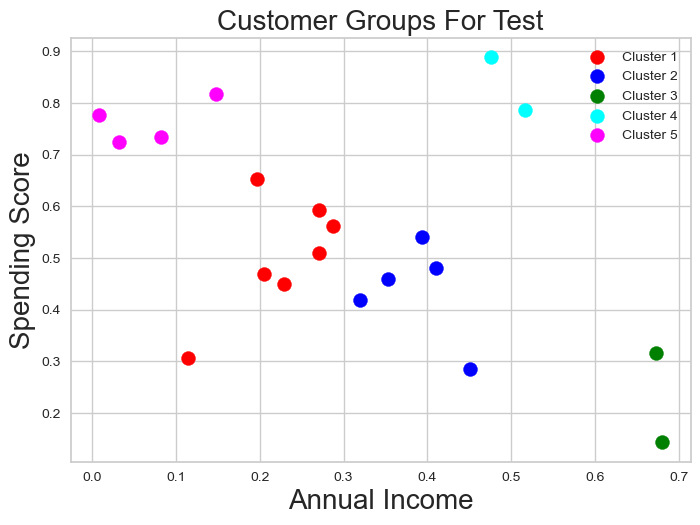

In [34]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test.iloc[y_pred_test == 4, 0], X_test.iloc[y_pred_test == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Annual Income',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

For Feature Age	Spending Score (1-100)

In [35]:
X=data.iloc[:,[2,4]]
X

,Age,Spending Score (1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959
...,...,...
195,0.326923,0.795918
196,0.519231,0.275510
197,0.269231,0.744898
198,0.269231,0.173469


In [36]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


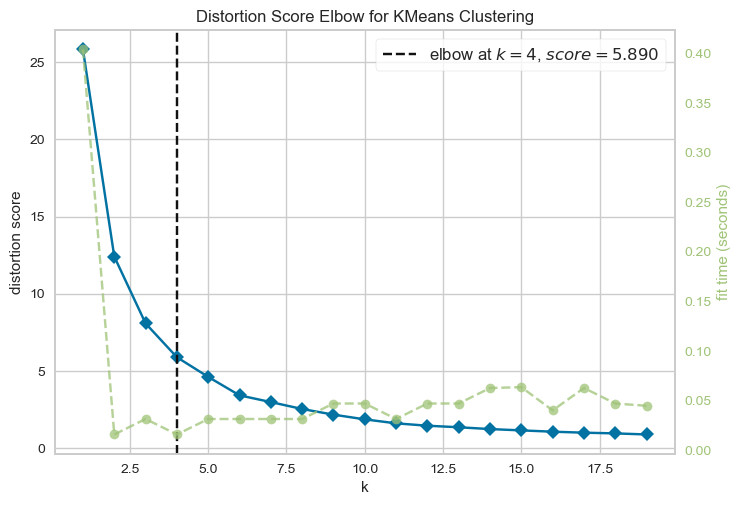

In [37]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [38]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[0.2443634  0.8085855 ]
 [0.74182692 0.49183673]
 [0.18618881 0.39169759]
 [0.57439271 0.14983888]]
KMeansModel labels are :  [0 3 2 0 3 3 0 3 2 3 2 2 2 2 2 0 3 0 2 2 2 1 1 1 1 0 0 2 0 2 2 3 0 1 3 1 0
 2 0 3 1 1 0 3 0 0 3 2 3 0 3 0 2 3 0 0 2 1 0 0 0 0 1 0 2 0 3 1 2 1 0 0 2 0
 1 2 2 0 0 1 3 1 3 2 2 1 3 0 0 3 2 2 2 0 0 2 2 2 2 3 2 0 3 2 0 0 2 0 1 2 3
 3 3 0 0 1 1 3 0 1 1 0 1 3 2 0 1 1 0 0 3 3 3 2 1 1 3 3 1 0 0 1 3 1 3 1 2 0
 1 0 0 1 3 0 0 1 3 1 2 3 2 0 3 0 1 2 1 1 3 1 0 2 0 2 1 0 1 0 0 2]
KMeansModel intertia is :  5.889922193067281
KMeansModel No. of iteration is :  7


In [39]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([0, 1, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 3, 1, 0, 2, 0, 0, 1, 2])

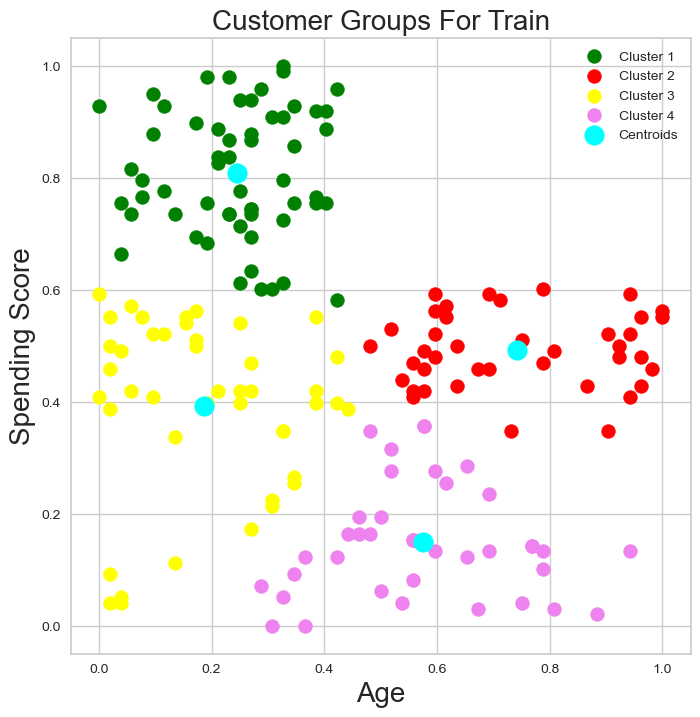

In [40]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()

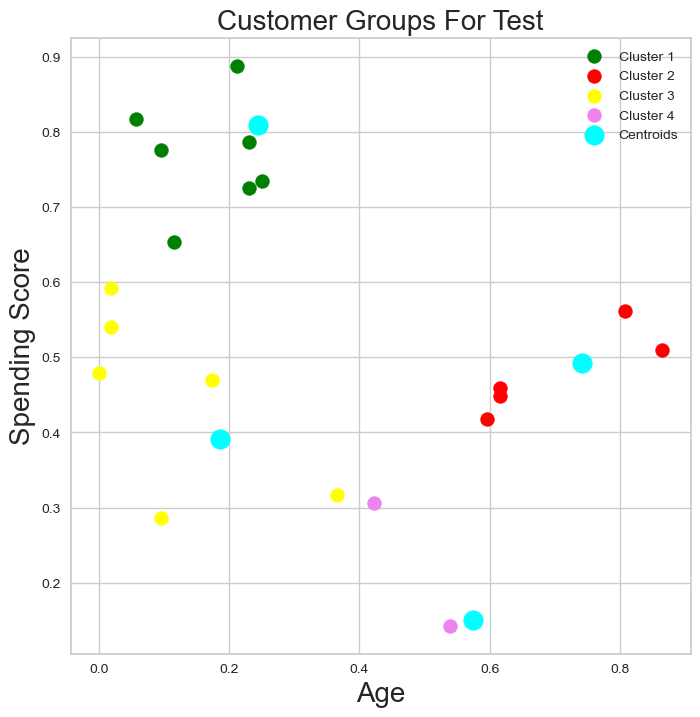

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()

AgglomerativeClustering

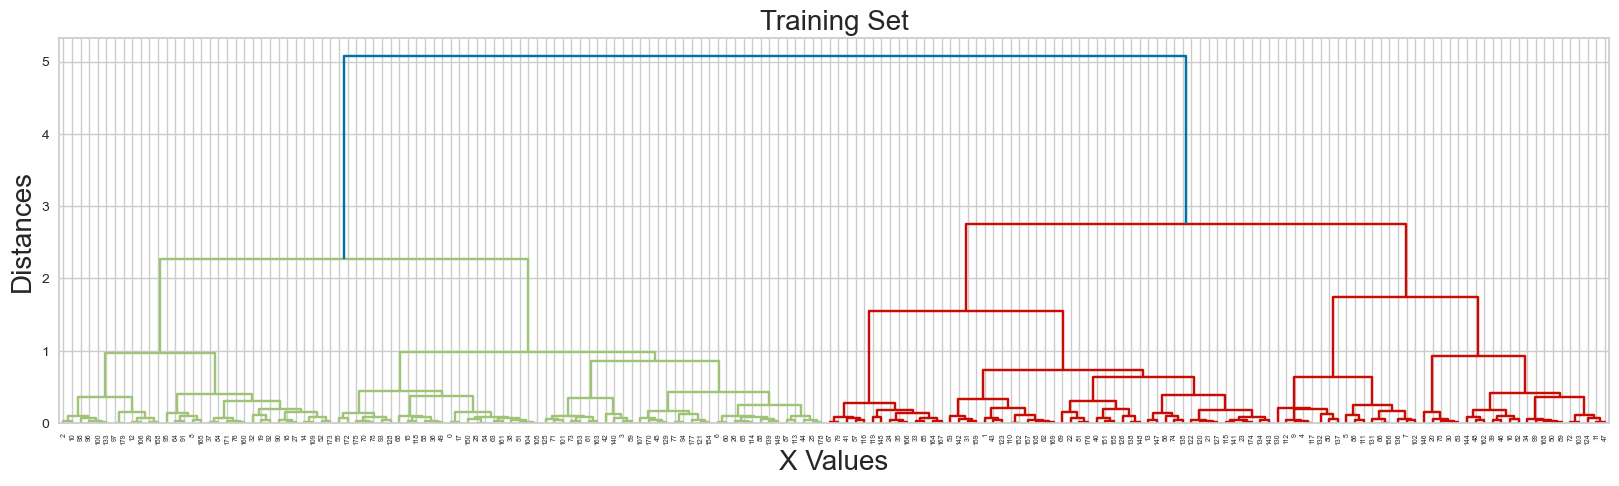

In [42]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

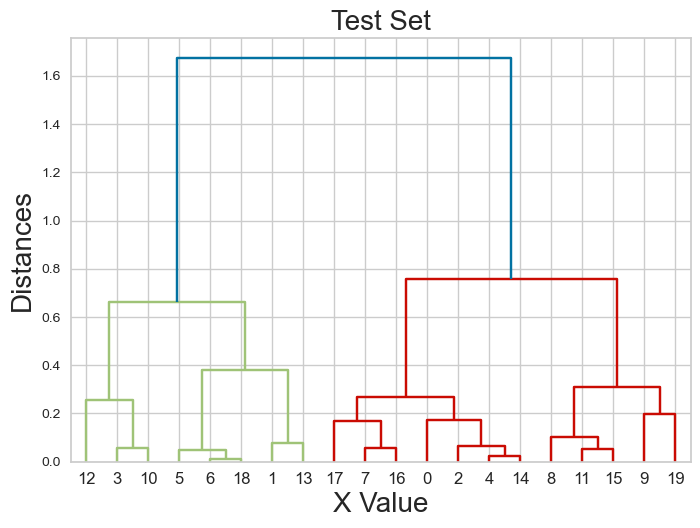

In [43]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [44]:
#number of cluster 4 
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [45]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 2, 3, 1, 0, 0, 1, 0, 3, 0, 3, 0, 3, 2, 3, 1, 0, 1, 3, 3, 0, 2,
        2, 2, 2, 1, 1, 3, 1, 3, 0, 2, 3, 2, 0, 2, 1, 3, 1, 0, 2, 2, 1, 2,
        1, 1, 0, 0, 0, 1, 0, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1,
        0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 3, 1, 1, 2, 0, 2, 0, 0, 3, 2, 0, 1,
        1, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 0, 3, 1, 0, 0, 1, 1, 3, 1, 2, 3,
        2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
        0, 3, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1,
        1, 2, 0, 2, 3, 2, 3, 1, 0, 1, 2, 3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1,
        2, 1, 1, 3], dtype=int64),
 'Test',
 array([2, 0, 2, 3, 2, 0, 0, 2, 1, 1, 3, 1, 3, 0, 2, 1, 2, 2, 0, 1],
       dtype=int64))

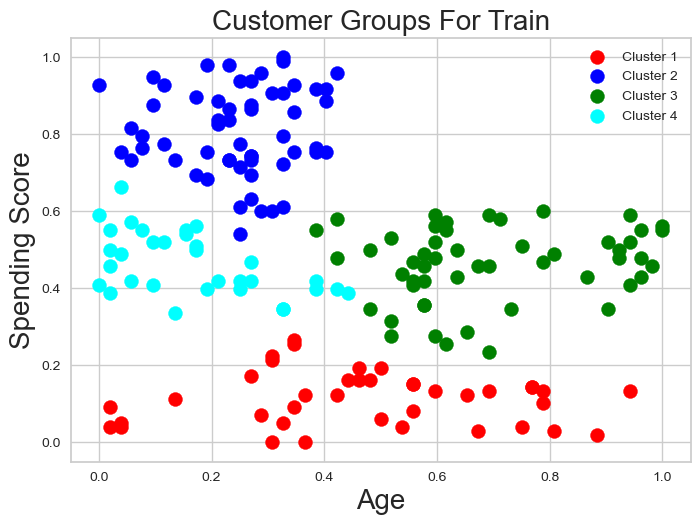

In [46]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

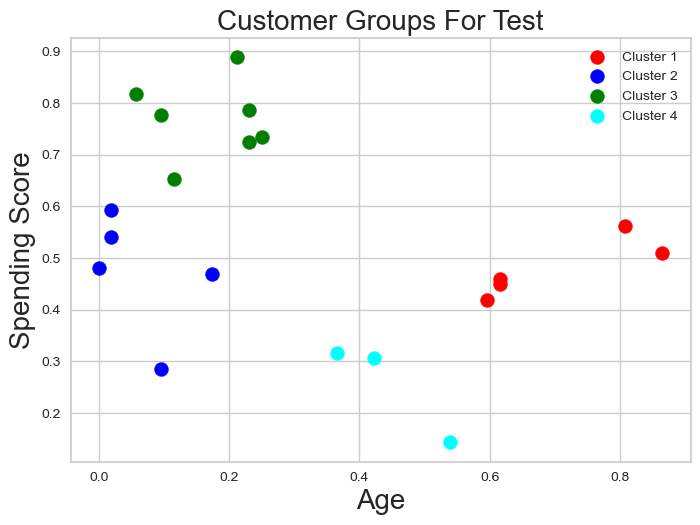

In [47]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Spending Score',fontsize=20)
plt.legend()
plt.show()

For Feature Age	Annual Income (k$)

In [48]:
X=data.iloc[:,[2,3]]
X

,Age,Annual Income (k$)
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.008197
3,0.096154,0.008197
4,0.250000,0.016393
...,...,...
195,0.326923,0.860656
196,0.519231,0.909836
197,0.269231,0.909836
198,0.269231,1.000000


In [49]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


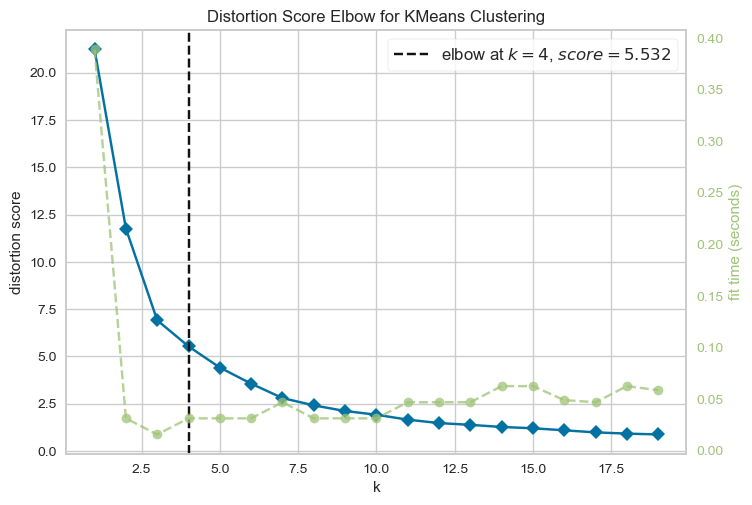

In [50]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [51]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[0.15659341 0.19253931]
 [0.28076923 0.609538  ]
 [0.86111111 0.25804493]
 [0.56122449 0.38056206]]
KMeansModel labels are :  [1 3 1 0 2 2 1 3 0 3 0 1 3 3 0 0 1 1 0 0 1 3 3 3 2 1 1 0 0 1 0 3 0 2 3 2 0
 0 1 0 2 2 0 3 1 1 1 1 1 0 1 1 0 3 1 1 3 2 0 0 1 0 3 1 0 1 3 2 0 3 1 0 1 0
 3 1 0 0 1 2 2 3 1 1 0 2 2 1 1 3 0 0 0 1 0 1 0 0 0 1 0 0 3 0 1 1 3 3 3 0 3
 3 2 1 0 3 2 3 1 2 3 1 3 1 1 0 2 3 1 3 2 3 2 0 3 3 3 3 2 1 0 3 2 3 1 2 1 3
 3 1 1 2 3 0 1 2 1 3 3 3 0 1 0 0 2 0 2 2 3 3 1 1 1 0 3 3 3 1 1 0]
KMeansModel intertia is :  5.5320418488754
KMeansModel No. of iteration is :  6


In [52]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 2, 1, 0, 0, 3, 3, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 3, 0])

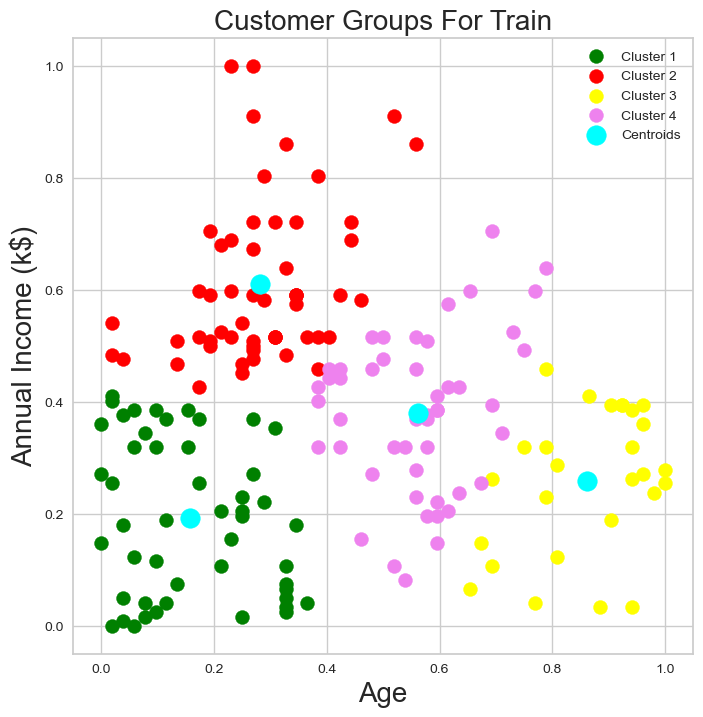

In [53]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

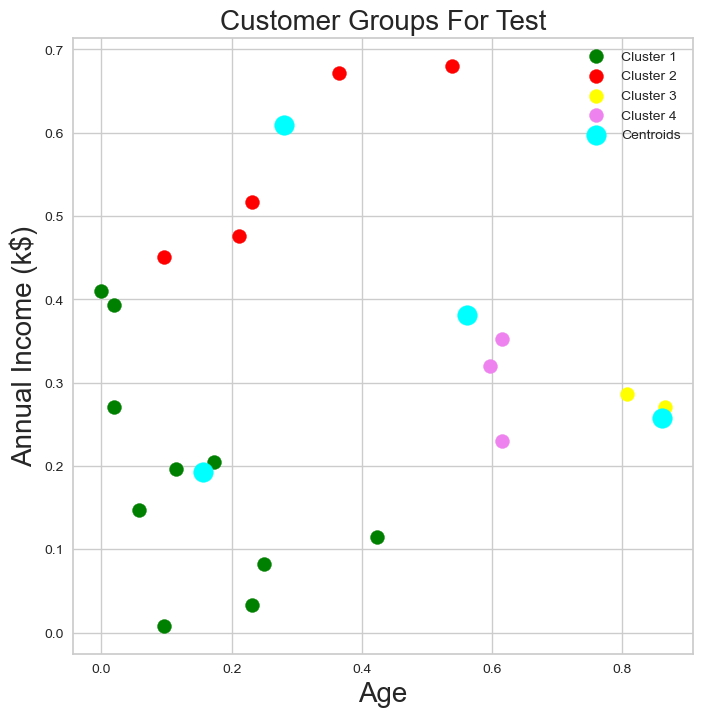

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='violet', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

AggClusteringModel

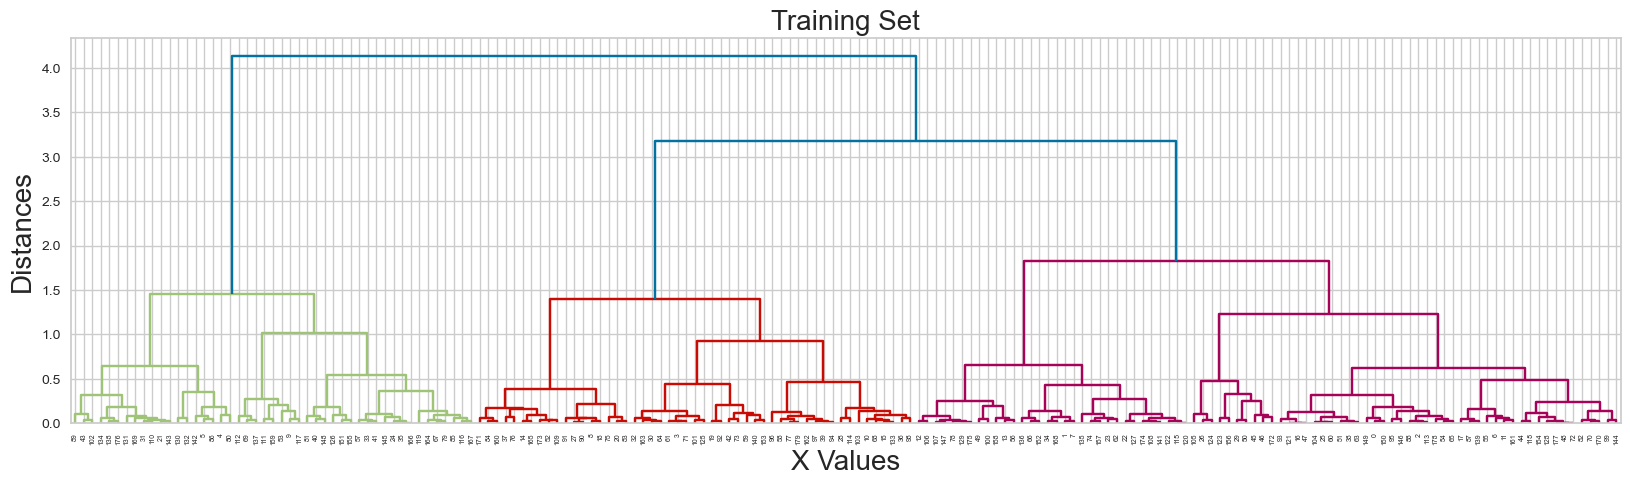

In [55]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

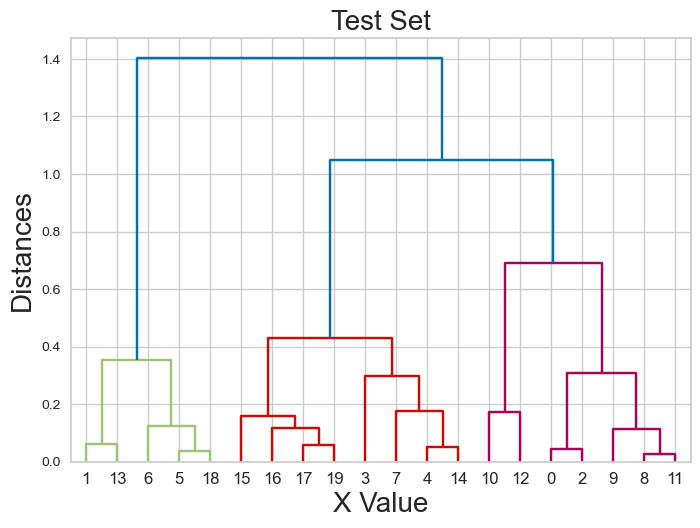

In [56]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [57]:
#number of cluster 4 
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [58]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 3, 1, 2, 0, 0, 1, 3, 2, 0, 2, 1, 3, 3, 2, 2, 1, 1, 2, 2, 2, 0,
        3, 3, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 1, 2, 0, 0, 2, 0,
        1, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 1, 3, 0, 2, 2, 1, 2, 3, 1, 2, 1,
        3, 0, 2, 0, 1, 2, 1, 2, 3, 2, 2, 2, 3, 0, 0, 0, 1, 2, 2, 0, 0, 1,
        1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 0, 2, 1, 1, 3, 3, 3, 2,
        0, 0, 0, 1, 2, 3, 0, 0, 1, 0, 3, 1, 3, 1, 1, 2, 0, 3, 1, 3, 0, 0,
        0, 2, 0, 3, 3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 1, 3, 0, 1, 1, 0, 3, 2,
        1, 0, 1, 3, 3, 0, 2, 1, 2, 2, 0, 2, 0, 0, 3, 0, 1, 2, 1, 2, 3, 3,
        0, 1, 1, 2], dtype=int64),
 'Test',
 array([2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 3, 2, 3, 1, 0, 0, 0, 0, 1, 0],
       dtype=int64))

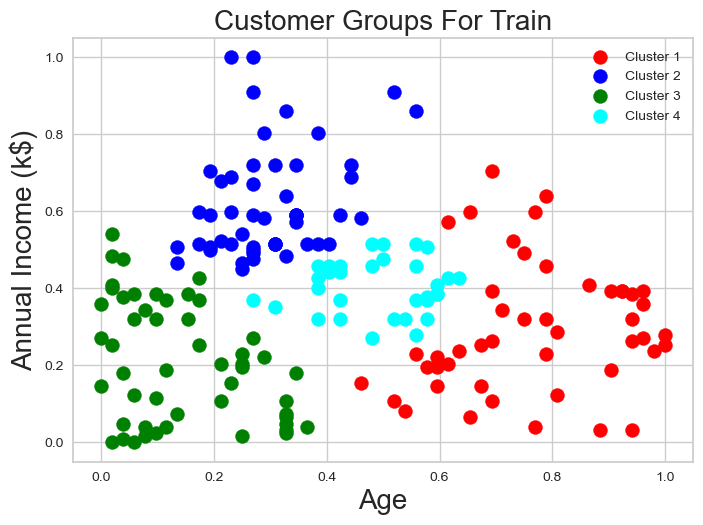

In [59]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

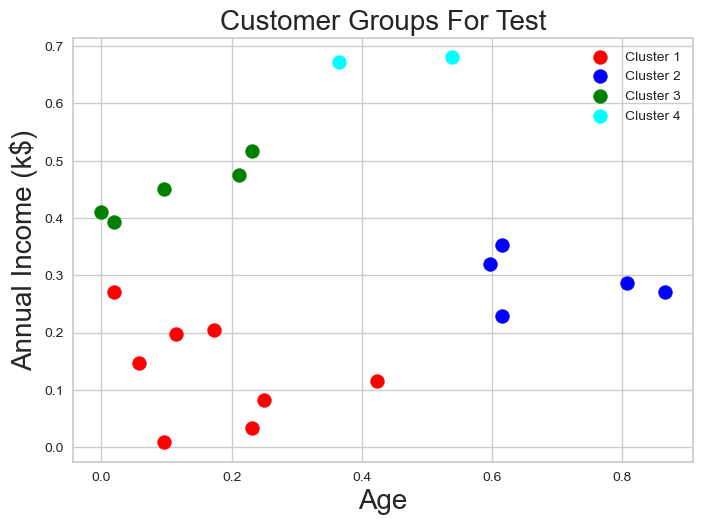

In [60]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

For Feature Gender	Spending Score (1-100)

In [61]:
X=data.iloc[:,[1,4]]
X

,Gender,Spending Score (1-100)
0,1.0,0.387755
1,1.0,0.816327
2,0.0,0.051020
3,0.0,0.775510
4,0.0,0.397959
...,...,...
195,0.0,0.795918
196,0.0,0.275510
197,1.0,0.744898
198,1.0,0.173469


In [62]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


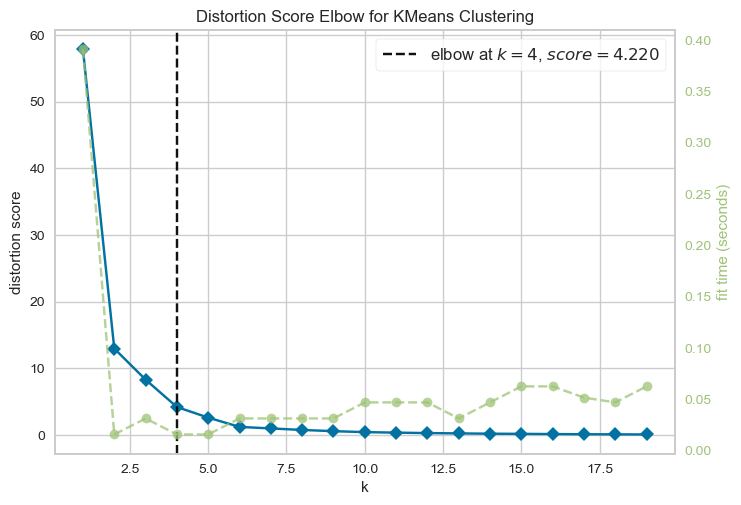

In [63]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [64]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[6.66133815e-16 3.48639456e-01]
 [1.00000000e+00 6.74069628e-01]
 [1.00000000e+00 1.91094620e-01]
 [0.00000000e+00 7.74943311e-01]]
KMeansModel labels are :  [1 2 0 3 0 2 3 0 0 2 0 0 0 1 1 3 2 1 1 1 2 0 0 1 1 1 1 0 3 0 0 0 1 2 0 0 1
 0 3 0 1 1 1 0 3 3 2 0 2 3 0 1 0 0 3 3 1 0 1 1 3 1 0 3 2 3 0 1 0 0 3 3 0 3
 0 2 1 3 1 1 2 1 2 2 0 2 0 1 3 0 1 2 1 3 3 0 0 0 0 2 0 3 0 0 3 1 0 1 2 0 2
 0 2 1 1 0 0 2 1 0 1 1 3 0 2 1 1 3 3 1 2 0 2 0 0 0 2 0 3 3 3 1 2 0 2 0 2 3
 3 3 1 0 2 3 1 1 0 0 0 2 1 3 2 1 1 0 1 0 2 2 1 1 3 3 0 1 1 1 3 2]
KMeansModel intertia is :  4.220282299685489
KMeansModel No. of iteration is :  7


In [65]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([3, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 1, 3, 1, 3, 3, 0, 0])

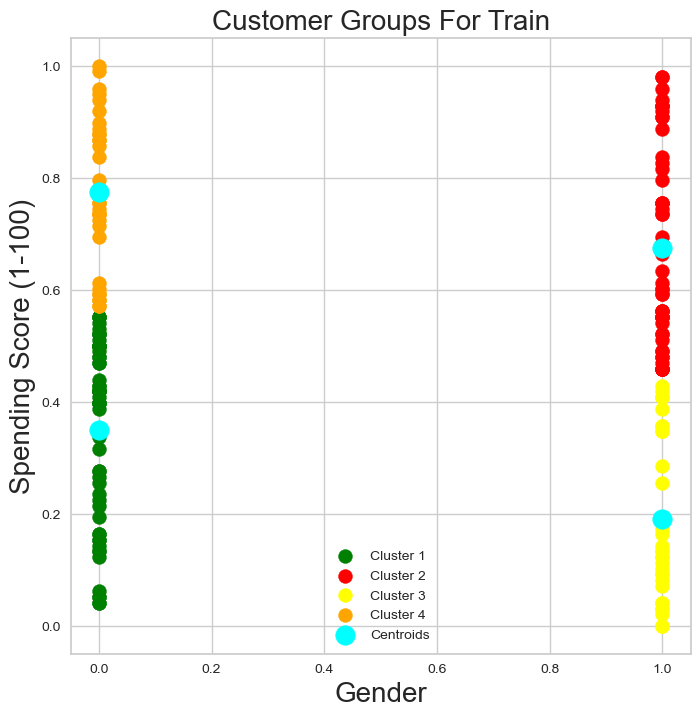

In [66]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='orange', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()

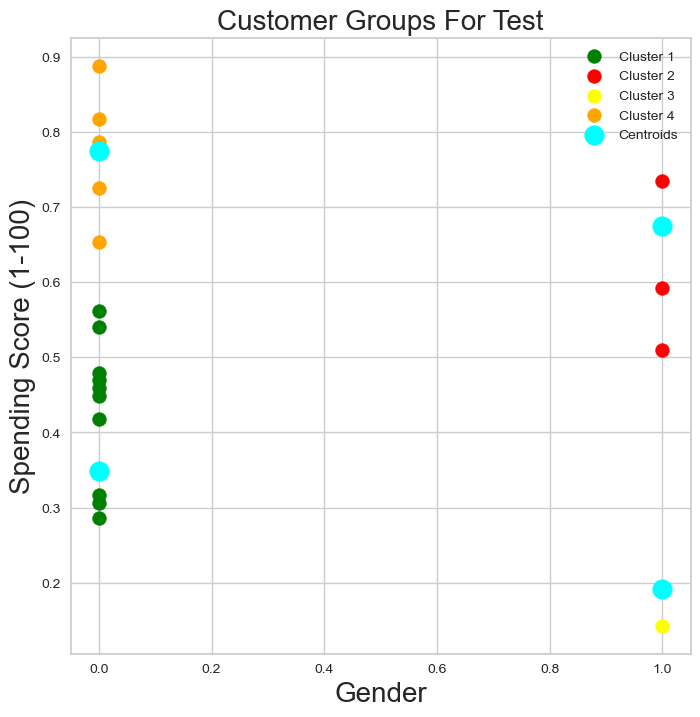

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='orange', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()

AggClusteringModel

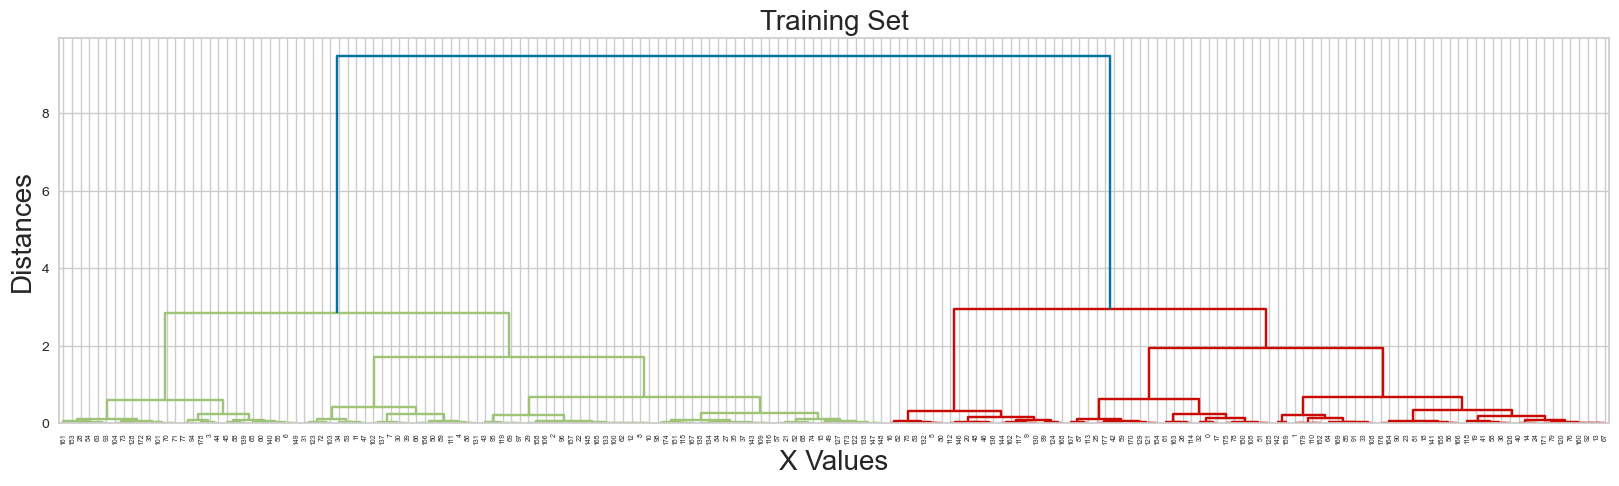

In [68]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

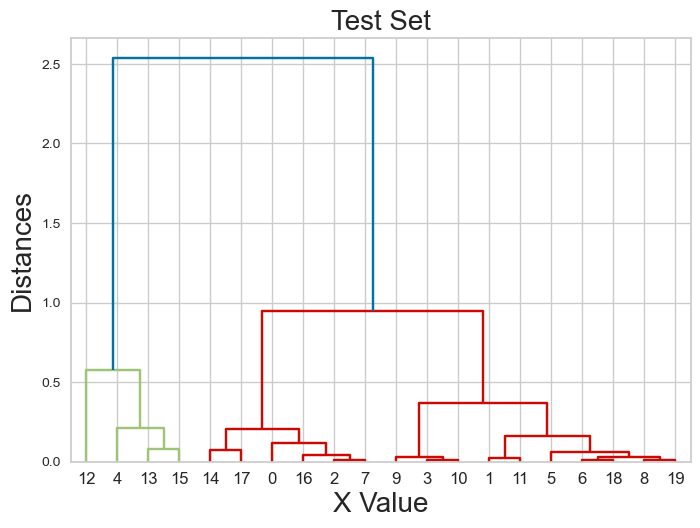

In [69]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [70]:
#number of cluster 4
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [71]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([0, 0, 1, 3, 1, 2, 3, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1,
        1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 0, 1, 3, 1, 0, 0, 0, 1,
        3, 3, 2, 1, 2, 1, 1, 0, 1, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 3,
        1, 0, 1, 1, 3, 3, 1, 3, 1, 2, 0, 3, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0,
        3, 1, 0, 0, 0, 3, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 0, 1, 0, 0, 1,
        0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 3, 0, 2, 1,
        2, 1, 1, 1, 2, 1, 1, 3, 3, 0, 0, 1, 2, 1, 2, 1, 1, 3, 0, 1, 0, 3,
        0, 0, 1, 1, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 3, 1, 1, 0,
        0, 0, 3, 0], dtype=int64),
 'Test',
 array([2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 3, 1, 2, 1, 2, 2, 0, 0],
       dtype=int64))

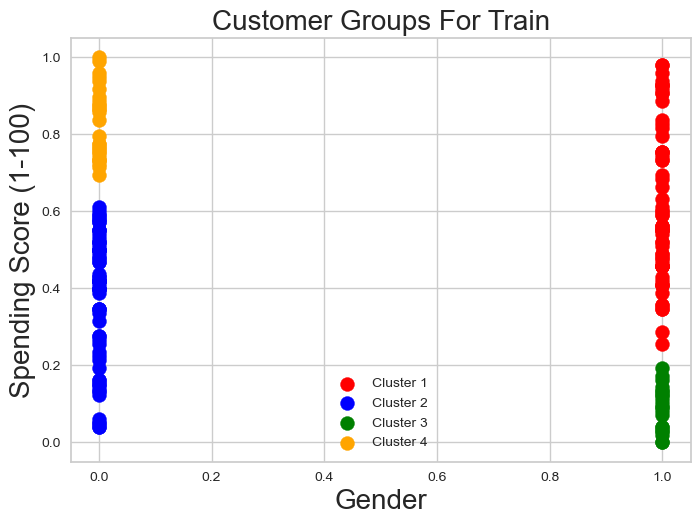

In [72]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

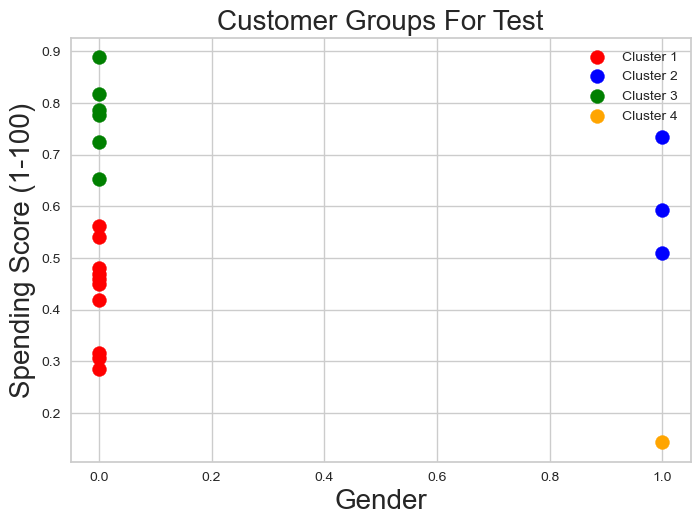

In [73]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

For Feature Gender	Age

In [74]:
X=data.iloc[:,[1,2]]
X

,Gender,Age
0,1.0,0.019231
1,1.0,0.057692
2,0.0,0.038462
3,0.0,0.096154
4,0.0,0.250000
...,...,...
195,0.0,0.326923
196,0.0,0.519231
197,1.0,0.269231
198,1.0,0.269231


In [75]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


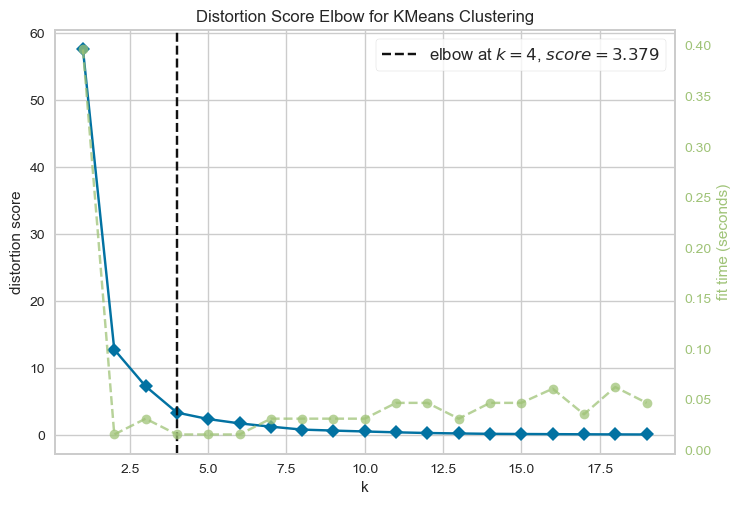

In [76]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [77]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[6.66133815e-16 2.42177314e-01]
 [1.00000000e+00 2.28988604e-01]
 [0.00000000e+00 6.58004158e-01]
 [1.00000000e+00 7.62179487e-01]]
KMeansModel labels are :  [1 1 0 0 2 3 0 2 0 3 0 0 0 1 1 0 1 1 1 1 1 2 2 3 3 1 1 0 0 0 0 2 1 3 2 2 1
 0 0 0 3 3 1 2 0 0 1 0 1 0 0 1 0 2 0 0 1 2 1 1 0 1 2 0 1 0 2 3 0 2 0 0 0 0
 2 1 1 0 1 3 3 3 1 1 0 3 2 1 0 2 1 1 1 0 0 0 0 0 0 1 0 0 2 0 0 1 0 1 3 0 3
 2 3 1 1 2 2 3 1 2 3 1 2 2 1 1 3 2 0 1 3 2 3 0 2 2 3 2 2 0 0 3 3 2 1 2 1 0
 2 0 1 2 3 0 1 3 2 2 0 3 1 0 1 1 3 0 3 2 1 3 1 1 0 0 2 1 3 1 0 1]
KMeansModel intertia is :  3.3794420348038345
KMeansModel No. of iteration is :  4


In [78]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 2, 0])

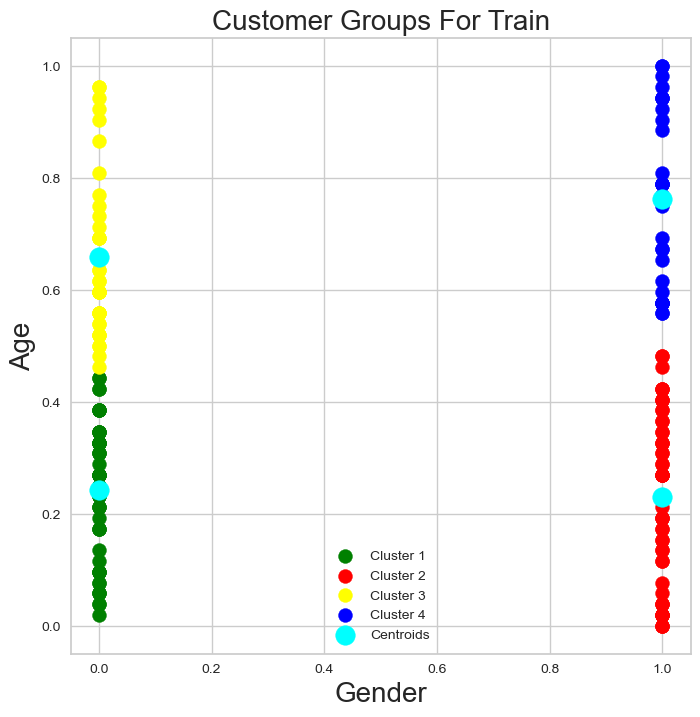

In [79]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()

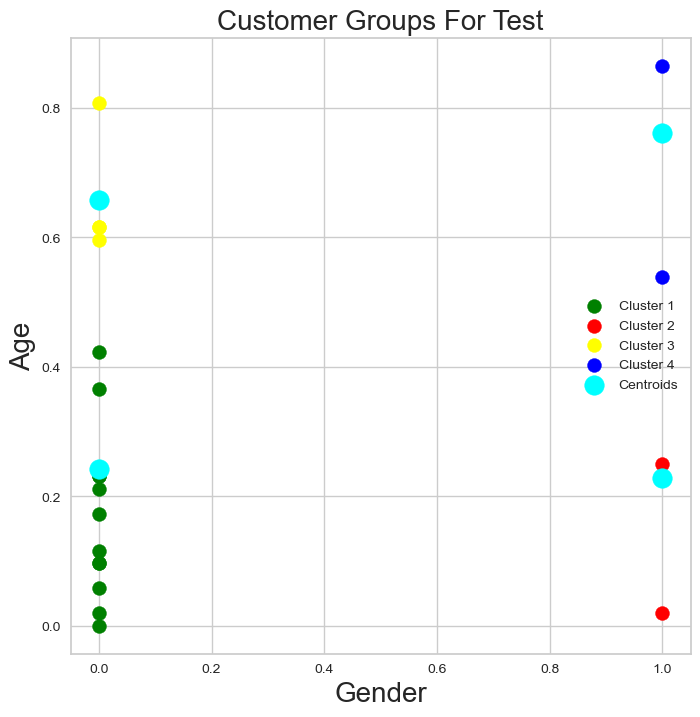

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()

AgglomerativeClustering

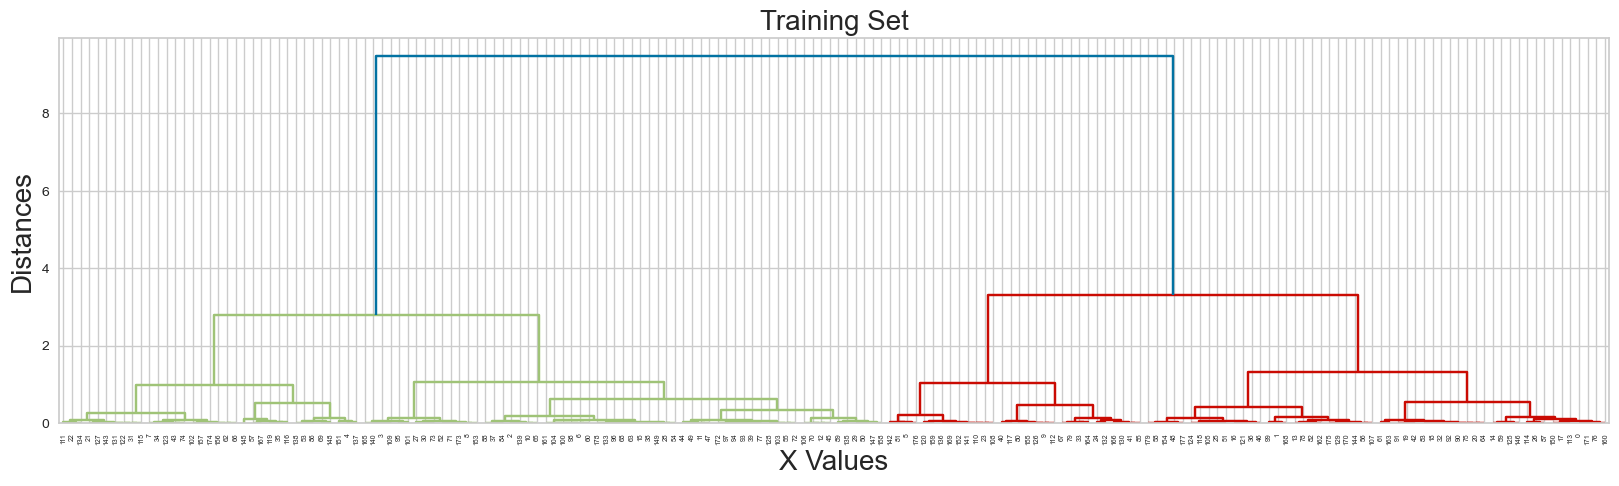

In [81]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

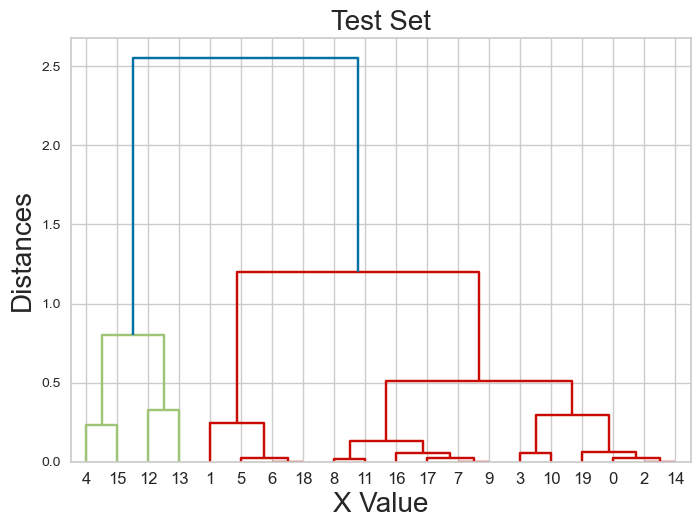

In [82]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [83]:
#number of cluster 4
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [84]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([0, 0, 1, 1, 3, 2, 1, 3, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3,
        3, 2, 2, 0, 0, 1, 1, 1, 1, 3, 0, 2, 3, 3, 0, 1, 1, 1, 2, 2, 0, 3,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 1, 0, 1,
        3, 2, 1, 3, 1, 1, 1, 1, 3, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 3, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 1, 0, 2, 1,
        2, 3, 2, 0, 0, 3, 3, 2, 0, 3, 2, 0, 3, 3, 0, 0, 2, 3, 1, 0, 2, 3,
        2, 1, 3, 1, 2, 3, 3, 1, 1, 2, 2, 3, 0, 3, 0, 1, 3, 1, 0, 3, 2, 1,
        0, 2, 3, 3, 1, 2, 0, 1, 0, 0, 2, 1, 2, 3, 0, 2, 0, 0, 1, 1, 3, 0,
        2, 0, 1, 0], dtype=int64),
 'Test',
 array([0, 2, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 2, 0],
       dtype=int64))

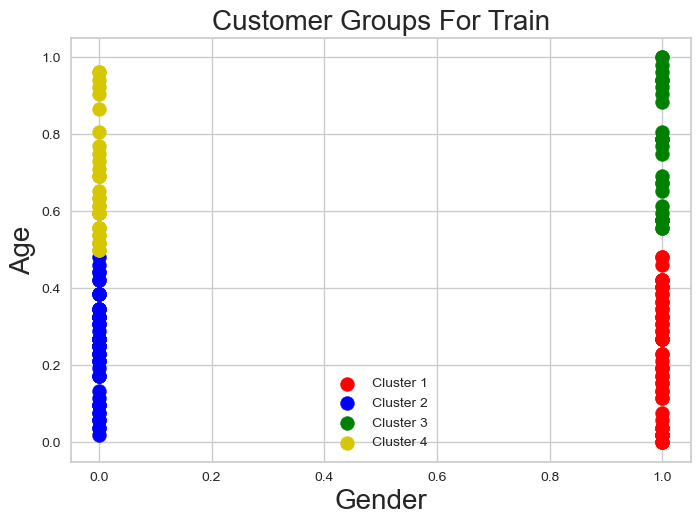

In [85]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()
plt.show()

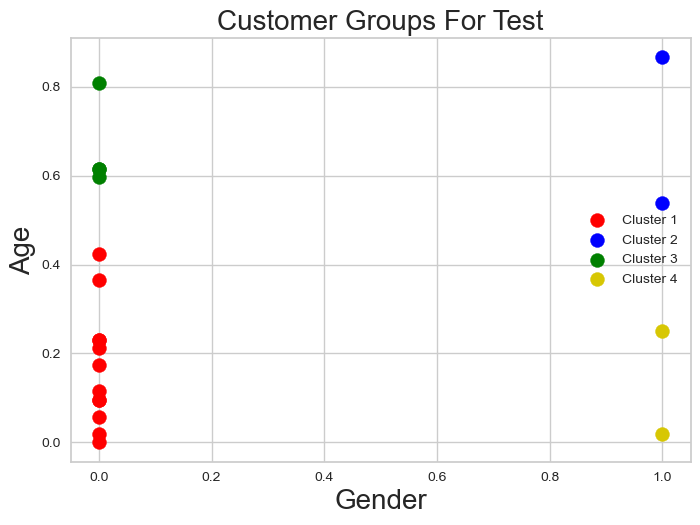

In [86]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.legend()
plt.show()

For Feature Gender	Annual Income (k$)

In [87]:
X=data.iloc[:,[1,3]]
X

,Gender,Annual Income (k$)
0,1.0,0.000000
1,1.0,0.000000
2,0.0,0.008197
3,0.0,0.008197
4,0.0,0.016393
...,...,...
195,0.0,0.860656
196,0.0,0.909836
197,1.0,0.909836
198,1.0,1.000000


In [88]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


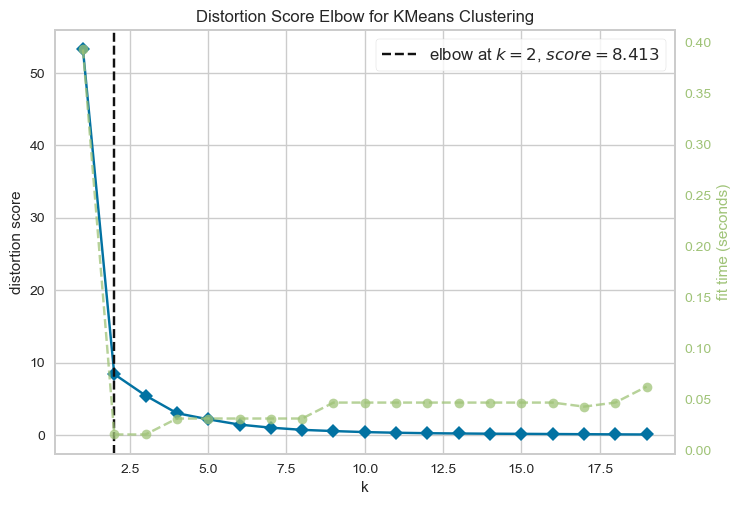

In [89]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [90]:
#Number Of Cluster 2
KMeansModel = KMeans(n_clusters=2,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[1.00000000e+00 3.90027322e-01]
 [5.55111512e-17 3.73036202e-01]]
KMeansModel labels are :  [0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0]
KMeansModel intertia is :  8.41335704447729
KMeansModel No. of iteration is :  2


In [91]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

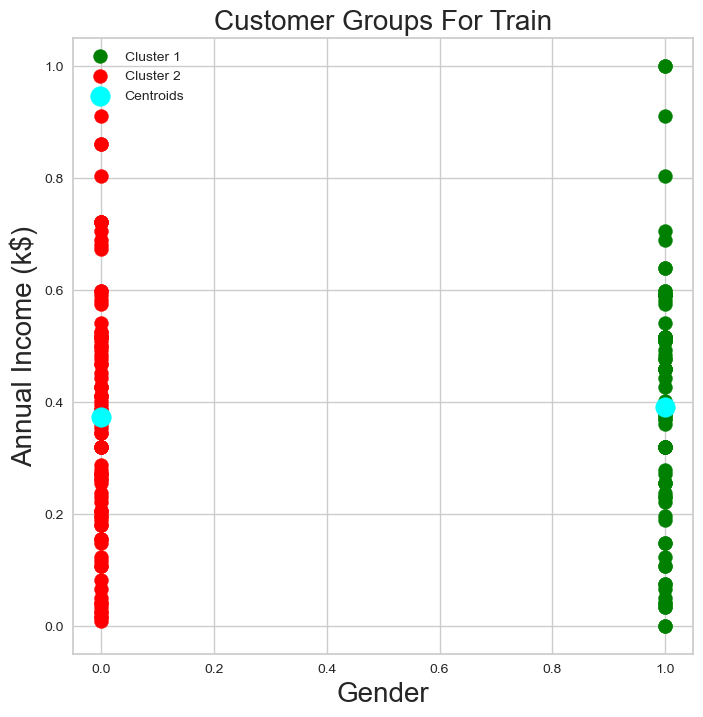

In [92]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

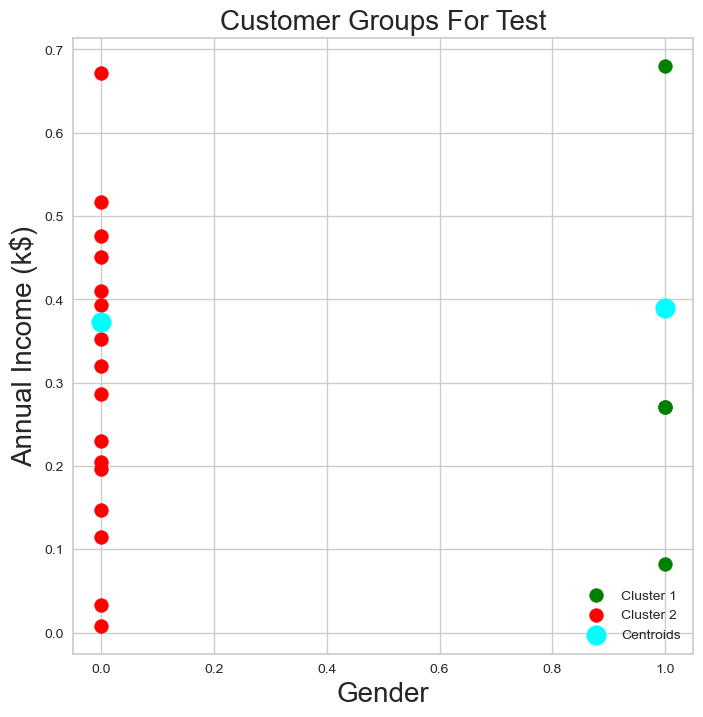

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()

 AgglomerativeClustering

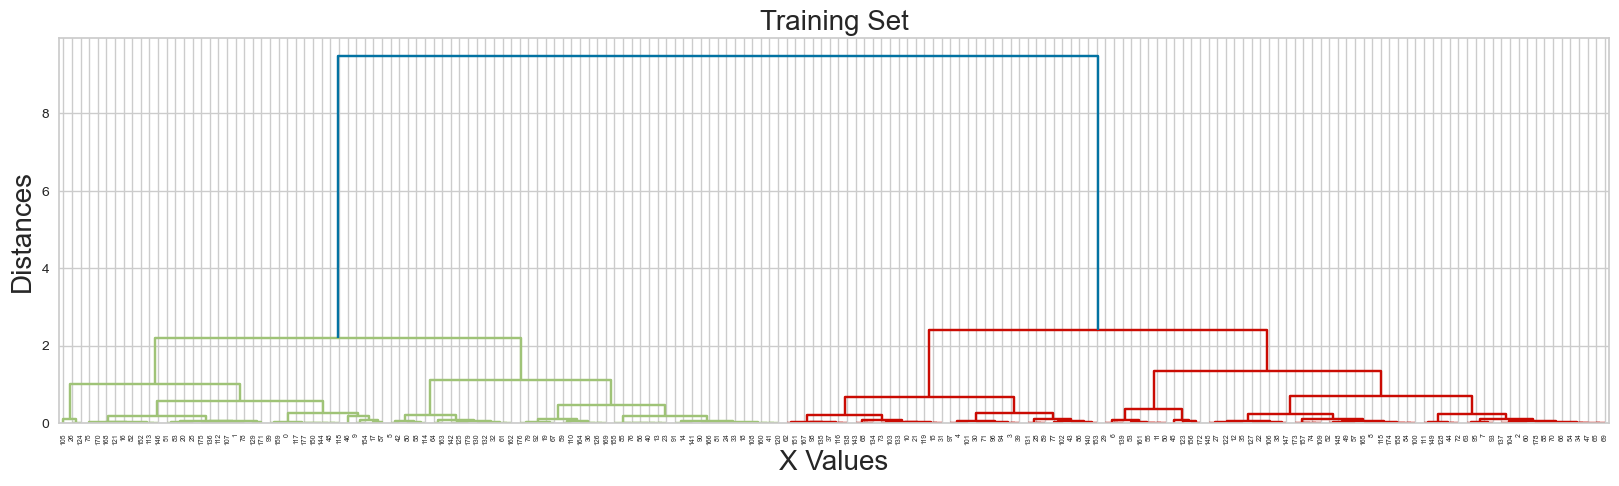

In [94]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

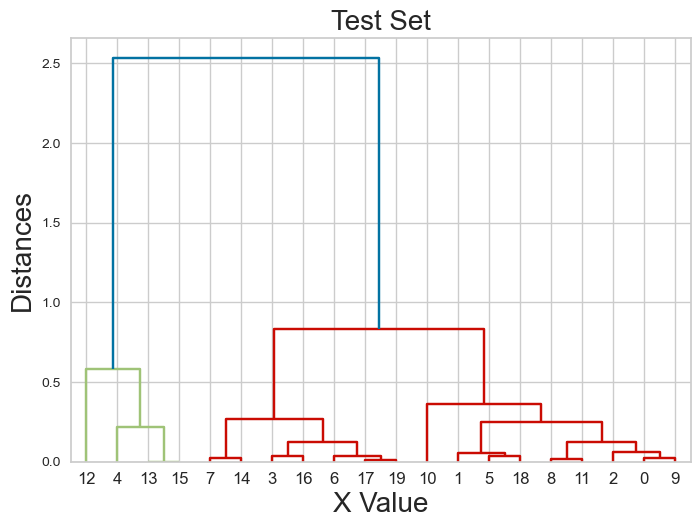

In [95]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [96]:
#number of cluster 2
AggClusteringModel = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [97]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1], dtype=int64),
 'Test',
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       dtype=int64))

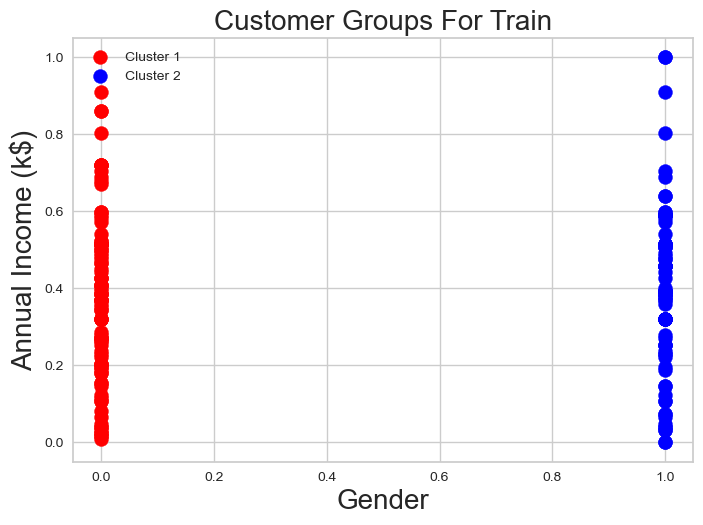

In [98]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

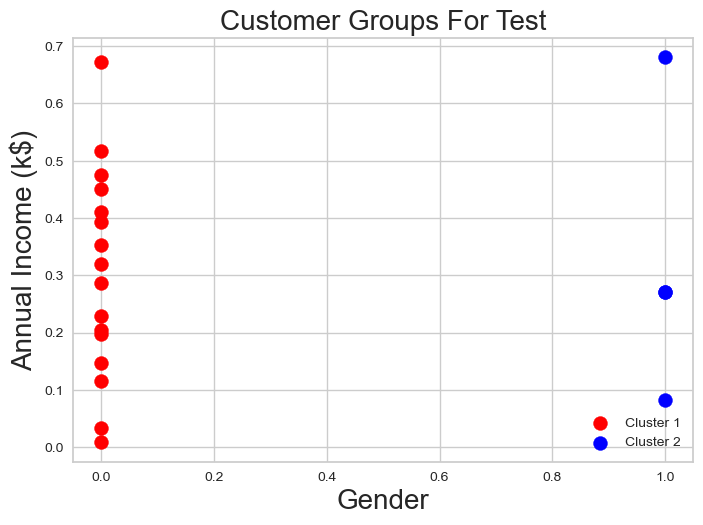

In [99]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Annual Income (k$)',fontsize=20)
plt.legend()
plt.show()

For all Feature

In [100]:
X=data.iloc[:,1:]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [101]:
PCAModel = PCA(n_components=2, svd_solver='auto')
X=PCAModel.fit_transform(X)
X=pd.DataFrame(X,columns=['Feature1','Feature2'])
X

,Feature1,Feature2
0,0.532955,-0.227841
1,0.513939,-0.493080
2,-0.446266,0.087079
3,-0.478796,-0.366617
4,-0.451984,0.003006
...,...,...
195,-0.442610,-0.237388
196,-0.405571,0.256687
197,0.555315,-0.316617
198,0.586009,0.071676


In [102]:
X_train, X_test= train_test_split(X,test_size=0.1, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (180, 2)
X_test shape is  (20, 2)


Kmeans

D:\Project\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


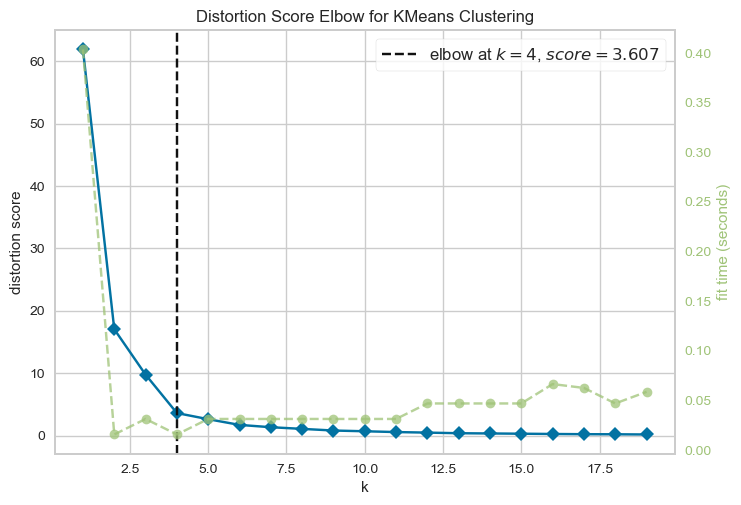

In [103]:
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [104]:
#Number Of Cluster 4
KMeansModel = KMeans(n_clusters=4,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[ 0.57967034  0.25228842]
 [-0.42146049  0.27520155]
 [-0.45713731 -0.23002397]
 [ 0.53759711 -0.33780821]]
KMeansModel labels are :  [3 0 2 2 1 0 2 1 2 0 2 1 1 3 3 2 0 3 3 3 0 1 1 0 0 3 3 2 2 1 1 1 3 0 1 1 3
 2 2 1 0 0 3 1 2 2 0 1 0 2 1 3 2 1 2 2 0 1 3 3 2 3 1 2 3 2 1 0 2 1 2 2 1 2
 1 0 3 2 3 0 0 0 0 0 2 0 1 3 2 1 3 3 3 2 2 2 2 1 2 0 2 2 1 1 2 3 1 3 0 2 0
 1 0 3 3 1 1 0 3 1 0 3 1 1 0 3 0 1 2 3 0 1 0 2 1 1 0 1 1 2 2 0 0 1 0 1 0 2
 1 2 3 1 0 2 3 0 1 1 1 0 3 2 0 3 0 2 0 1 0 0 3 3 2 2 1 3 0 3 2 0]
KMeansModel intertia is :  3.6067276628975202
KMeansModel No. of iteration is :  2


In [105]:
y_pred = KMeansModel.predict(X_test)
y_pred

array([2, 1, 2, 1, 3, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 3, 2, 2, 1, 2])

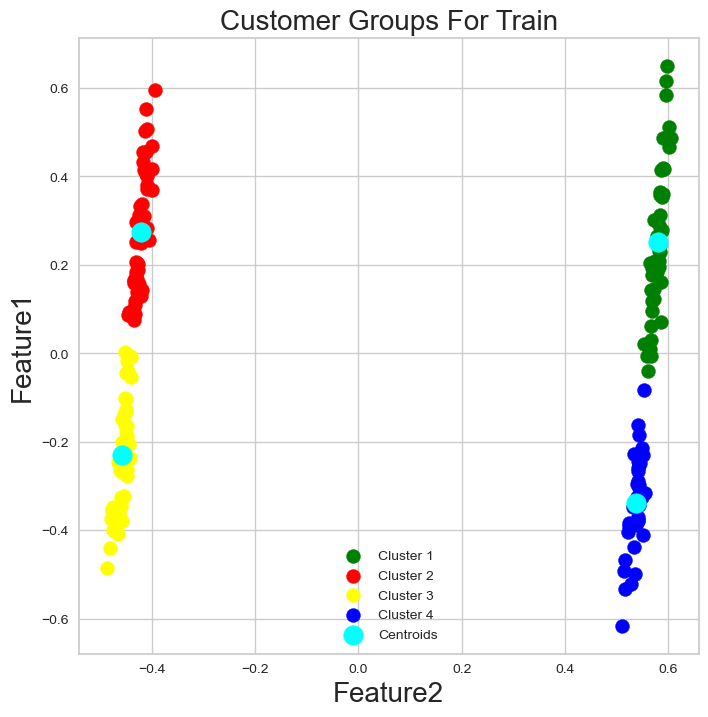

In [106]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(8,8))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_train.iloc[y==3,0], X_train.iloc[y==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Feature2',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()

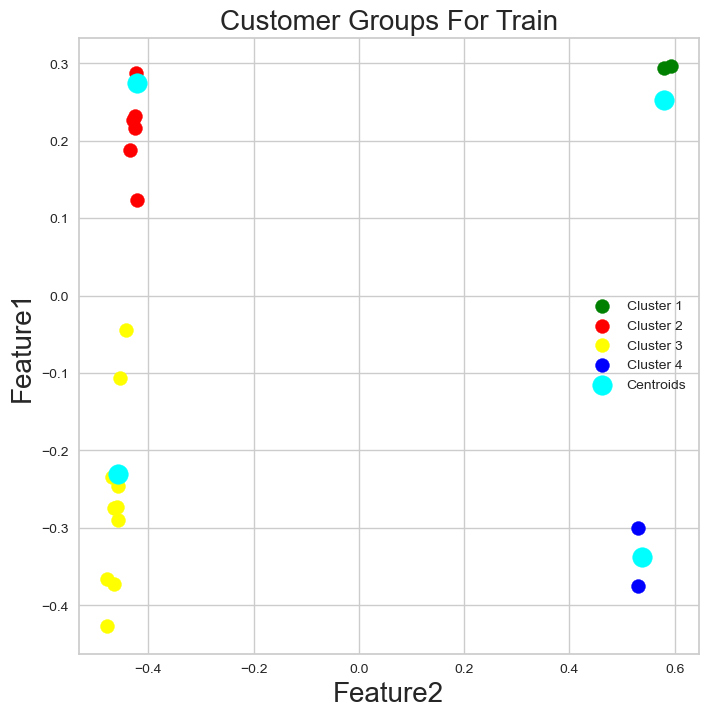

In [107]:
plt.figure(figsize=(8,8))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X_test.iloc[y_pred==3,0], X_test.iloc[y_pred==3,1], s=100, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Feature2',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()

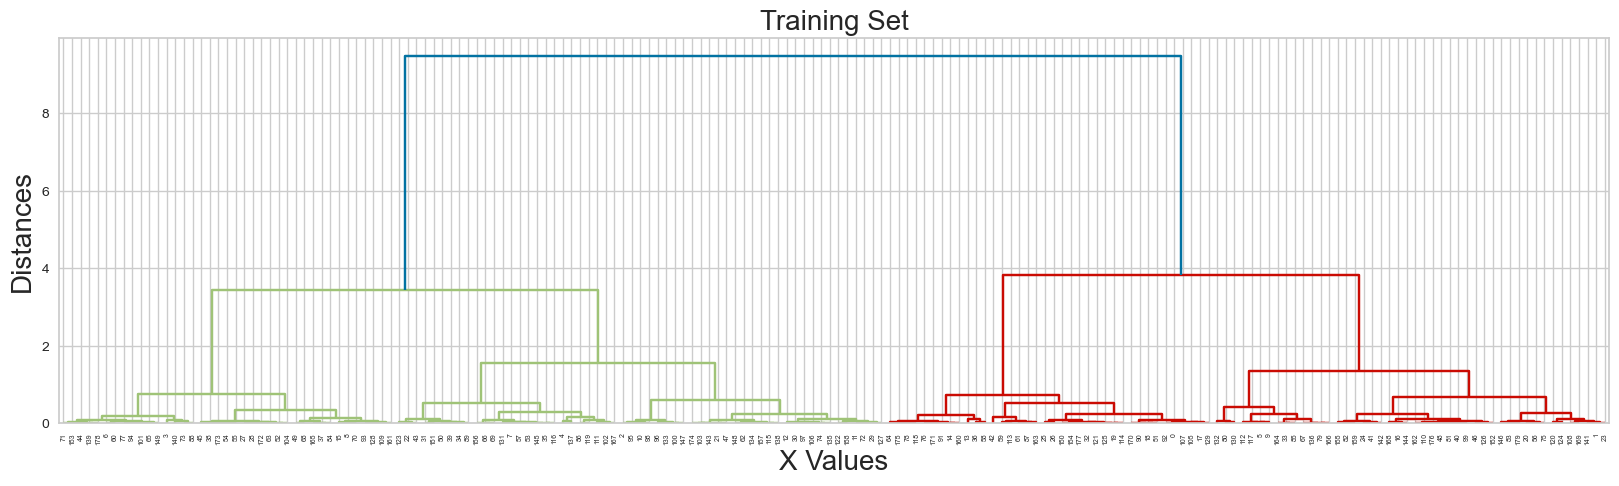

In [108]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Training Set',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

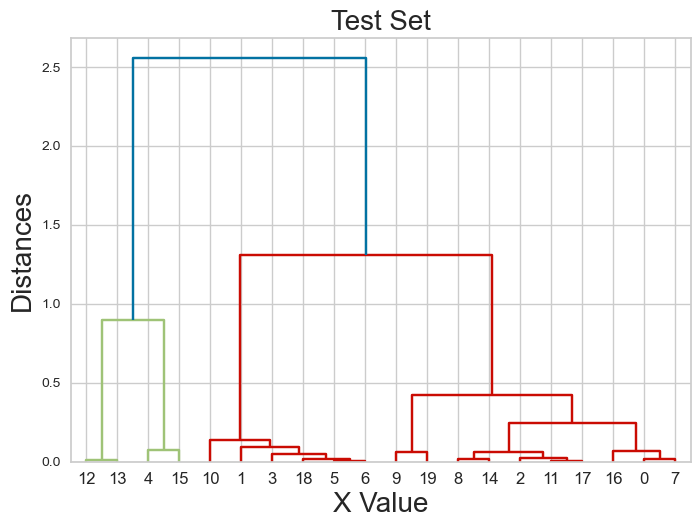

In [109]:
dendrogram = sch.dendrogram(sch.linkage(X_test, method = 'ward'))# it can be complete,average,single
plt.title('Test Set',fontsize=20)
plt.xlabel('X Value',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [110]:
#number of cluster 4
AggClusteringModel = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_pred_train = AggClusteringModel.fit_predict(X_train)
y_pred_test = AggClusteringModel.fit_predict(X_test)

In [111]:
'Train',y_pred_train,'Test',y_pred_test

('Train',
 array([2, 1, 0, 3, 0, 1, 3, 0, 3, 1, 0, 0, 0, 2, 2, 3, 1, 2, 2, 2, 1, 0,
        0, 1, 1, 2, 2, 3, 3, 0, 0, 0, 2, 1, 0, 0, 2, 3, 3, 0, 1, 1, 2, 0,
        3, 3, 1, 0, 1, 3, 0, 2, 3, 0, 3, 3, 1, 0, 2, 2, 3, 2, 0, 3, 2, 3,
        0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 1, 0, 2,
        3, 0, 2, 2, 2, 3, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 2, 0, 2, 1, 3,
        1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 3, 2, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 3, 2, 0, 1, 3,
        2, 1, 0, 0, 0, 1, 2, 3, 1, 2, 1, 3, 1, 0, 1, 1, 2, 2, 3, 3, 0, 2,
        1, 2, 3, 1], dtype=int64),
 'Test',
 array([0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 3, 3, 0, 1, 0, 0, 2, 0],
       dtype=int64))

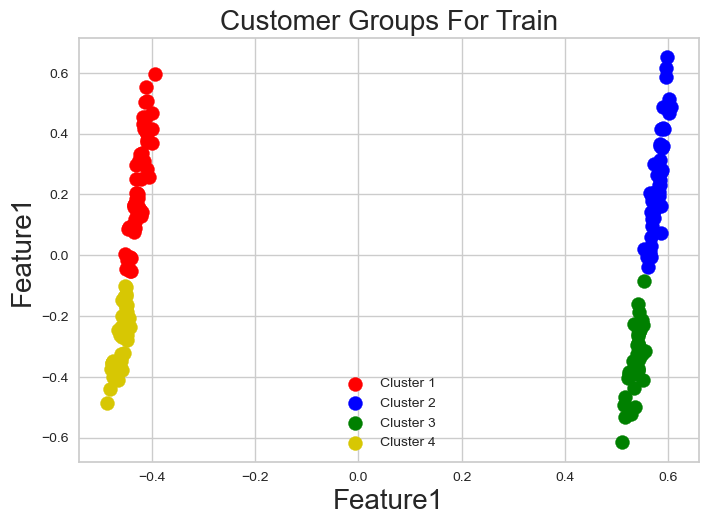

In [112]:
plt.scatter(X_train.iloc[y_pred_train == 0, 0], X_train.iloc[y_pred_train == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train.iloc[y_pred_train == 1, 0], X_train.iloc[y_pred_train == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train.iloc[y_pred_train == 2, 0], X_train.iloc[y_pred_train == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train.iloc[y_pred_train == 3, 0], X_train.iloc[y_pred_train == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Train',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()
plt.show()

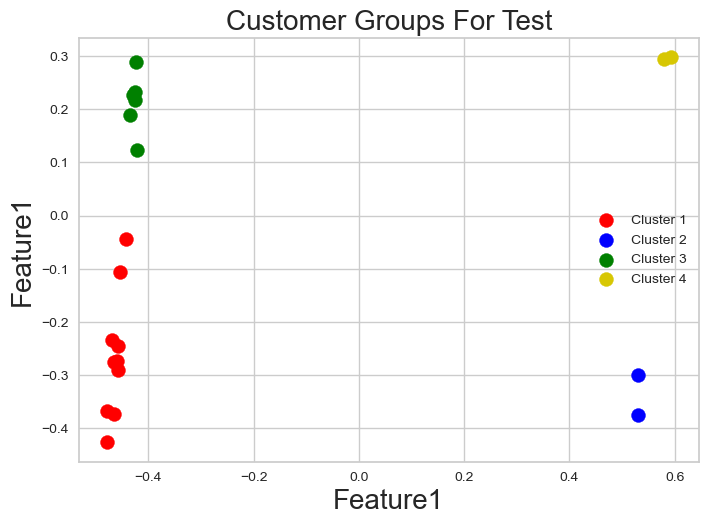

In [113]:
plt.scatter(X_test.iloc[y_pred_test == 0, 0], X_test.iloc[y_pred_test == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test.iloc[y_pred_test == 1, 0], X_test.iloc[y_pred_test == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test.iloc[y_pred_test == 2, 0], X_test.iloc[y_pred_test == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test.iloc[y_pred_test == 3, 0], X_test.iloc[y_pred_test == 3, 1], s = 100, c = 'y', label = 'Cluster 4')
plt.title('Customer Groups For Test',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature1',fontsize=20)
plt.legend()
plt.show()

Conclusion The best way to segment customers for data feature is Annual Income (k$)	Spending Score (1-100) small inertia 3.3368221729443226 segment customers to 5 cluster